In [29]:
import torch
import torchvision
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import os
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('dataset/bird-species-tiny.csv')
df = df[['filepaths', 'labels', 'data set']]
le = LabelEncoder()
le.fit(df['labels'])
df['labels'] = le.transform(df['labels'])
# df.columns = []
df.head(10)

,filepaths,labels,data set
0,train/BANDED BROADBILL/001.jpg,0,train
1,train/BANDED BROADBILL/002.jpg,0,train
2,train/BANDED BROADBILL/003.jpg,0,train
3,train/BANDED BROADBILL/004.jpg,0,train
4,train/BANDED BROADBILL/005.jpg,0,train
5,train/BANDED BROADBILL/006.jpg,0,train
6,train/BANDED BROADBILL/007.jpg,0,train
7,train/BANDED BROADBILL/008.jpg,0,train
8,train/BANDED BROADBILL/009.jpg,0,train
9,train/BANDED BROADBILL/010.jpg,0,train


In [34]:
class CustomDataset(Dataset):
    def __init__(self, data: pd.DataFrame, img_root_dir: str, split: str = 'train'):
        data.columns = ['filepaths', 'labels', 'data_set']
        data = data[data['data_set'] == split]
        self.labels = data['labels']
        self.img_root_dir = img_root_dir
        self.img_dir = data['filepaths']

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_root_dir, self.img_dir[idx])
        image = torchvision.io.read_image(img_path)
        label = self.labels[idx]
        return image, label

In [35]:
data_train = CustomDataset(df, './dataset')
data_test = CustomDataset(df, './dataset', 'test')
data_valid = CustomDataset(df, './dataset', 'valid')

In [36]:
len(data_train)

322

In [37]:
type(data_train[0][0])

torch.Tensor

In [38]:
data_train[0][0].shape

torch.Size([3, 224, 224])

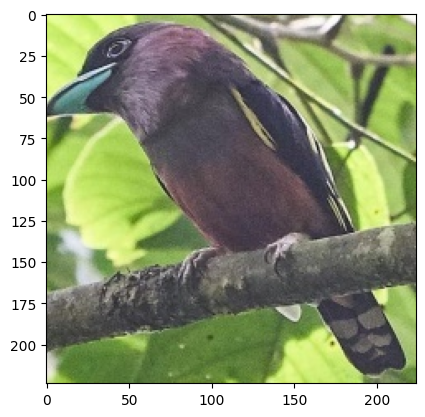

In [39]:
plt.imshow(data_train[0][0].permute(1, 2 ,0))

In [40]:
train_dataloader = DataLoader(data_train, batch_size=64, shuffle=True)
test_dataloader = DataLoader(data_test, batch_size=64, shuffle=True)
valid_dataloader = DataLoader(data_valid, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 3, 224, 224])
Labels batch shape: 64


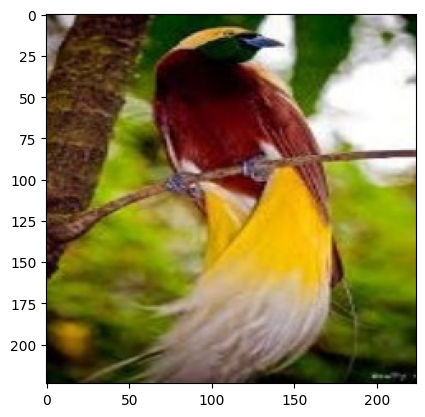

Label: 1


In [41]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {len(train_labels)}")
img = train_features[0].permute(1, 2 ,0).squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")